# Tissue classifier

In this notebook I'll develop a model to classify the tissue of a subset of images from CMP.

## libraries

In [11]:
from CMP_functions.preprocessing import *

import glob
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


## Data

In [20]:
PATH_info = '../data/images_info_table.csv'
PATH_img = '../data/images_jpeg/'
PATH_folders = '../classification_set/'

### Image selection 

- select only tissue with more than 20 images
- split in train and validation (80-20)
- create folder with link to the images

In [38]:
#load im info
info_df = pd.read_csv(PATH_info)

#get tissue with more than 20 images
class_count, class_list = get_classes(info_df, 'tissue', 20)

#subset im info to have only 20+ tissue images
info_df_20 = info_df[info_df.tissue.isin(class_list)]

#dictionary to be use while linking
name_to_class = get_img_dict(info_df_20, class_list,'tissue')

Soft Tissue not considered
Cervix not considered
Bladder not considered
Thyroid not considered
Prostate not considered
Liver not considered
Endometrium not considered
Testis not considered
Vulva not considered
Biliary Tract not considered
Adrenal Gland not considered
Uterus not considered
Placenta not considered


In [31]:
#folders to creates subdir
os.mkdir(PATH_folders+'train')
os.mkdir(PATH_folders+'validation')

In [33]:
def create_class_folders2(class_list, data_dir):
#     try:
#         os.mkdir(data_dir+feature)
#     except OSError:
#         print (f'Directory {feature} already exists')
#     else:
#         print (f'Successfully created the directory {feature}')

    for cl in class_list:
        try:
            os.mkdir(data_dir+'/'+cl)
        except OSError:
            print (f'Sub-directory {cl} already exists')
        else:
            print (f'Successfully created the sub-directory {cl}')

In [35]:
create_class_folders2(class_list, PATH_folders+'train/')
create_class_folders2(class_list, PATH_folders+'validation/')

Sub-directory Lung already exists
Sub-directory Haematopoietic and Lymphoid already exists
Sub-directory Breast already exists
Sub-directory Large Intestine already exists
Sub-directory Skin already exists
Sub-directory Ovary already exists
Sub-directory Central Nervous System already exists
Sub-directory Peripheral Nervous System already exists
Sub-directory Bone already exists
Sub-directory Head and Neck already exists
Sub-directory Pancreas already exists
Sub-directory Stomach already exists
Sub-directory Kidney already exists
Sub-directory Esophagus already exists
Successfully created the sub-directory Lung
Successfully created the sub-directory Haematopoietic and Lymphoid
Successfully created the sub-directory Breast
Successfully created the sub-directory Large Intestine
Successfully created the sub-directory Skin
Successfully created the sub-directory Ovary
Successfully created the sub-directory Central Nervous System
Successfully created the sub-directory Peripheral Nervous Syst

In [39]:
link_images(PATH_img, name_to_class, PATH_folders+'train/')

Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link success

Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link success

### Images From .tiff to dataset



In [2]:
# create a data generator

datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, 
                                                       samplewise_center=False,
                                                       featurewise_std_normalization=False,
                                                       samplewise_std_normalization=False,
                                                       zca_whitening=False,
                                                       zca_epsilon=1e-06,
                                                       rotation_range=0,
                                                       width_shift_range=0.0,
                                                       height_shift_range=0.0,
                                                       brightness_range=None,
                                                       shear_range=0.0,
                                                       zoom_range=0.0,
                                                       channel_shift_range=0.0,
                                                       fill_mode='nearest',
                                                       cval=0.0,
                                                       horizontal_flip=False,
                                                       vertical_flip=False,
                                                       rescale=None,
                                                       preprocessing_function=None,
                                                       data_format='channels_last',
                                                       validation_split=0.0,
                                                       interpolation_order=1,
                                                       dtype='float32')





In [15]:
# load and iterate training dataset

train = datagen.flow_from_directory('data/prova/', 
                                       class_mode='categorical',
                                       batch_size=32)

val = datagen.flow_from_directory('data/prova/',
                                     class_mode='categorical',
                                     batch_size=32)


Found 703 images belonging to 18 classes.
Found 703 images belonging to 18 classes.


In [16]:
train.target_size

(256, 256)

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(18))
model.add(Activation("softmax"))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(
    train,
    steps_per_epoch=22,
    epochs=5,
    validation_data=val,
    validation_steps=22)

Epoch 1/5
22/22 [==============================] - 107s 5s/step - loss: 0.6191 - accuracy: 0.9289 - val_loss: 0.0080 - val_accuracy: 0.9602
Epoch 2/5
22/22 [==============================] - 100s 5s/step - loss: 0.5079 - accuracy: 0.9516 - val_loss: 0.5458 - val_accuracy: 0.9659
Epoch 3/5
22/22 [==============================] - 86s 4s/step - loss: 9.4976 - accuracy: 0.8023 - val_loss: 1.4779 - val_accuracy: 0.9559
Epoch 4/5
22/22 [==============================] - 85s 4s/step - loss: 0.4805 - accuracy: 0.9673 - val_loss: 0.0304 - val_accuracy: 0.9972
Epoch 5/5
22/22 [==============================] - 92s 4s/step - loss: 0.1024 - accuracy: 0.9972 - val_loss: 0.0488 - val_accuracy: 1.0000


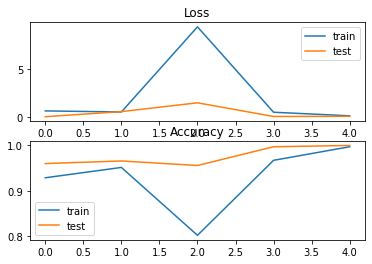

In [33]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [42]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

        
image_batch, label_batch = next(train)
#show_batch(image_batch, label_batch)
image_batch


array([[[[ 91., 101.,  76.],
         [130., 138.,  97.],
         [172., 182., 129.],
         ...,
         [148., 156., 115.],
         [142., 149., 108.],
         [140., 147., 106.]],

        [[102., 113.,  83.],
         [142., 151., 108.],
         [179., 182., 129.],
         ...,
         [155., 164., 119.],
         [147., 154., 110.],
         [141., 148., 104.]],

        [[117., 128.,  96.],
         [149., 158., 113.],
         [173., 172., 118.],
         ...,
         [159., 169., 119.],
         [153., 161., 114.],
         [146., 154., 107.]],

        ...,

        [[132., 140., 103.],
         [134., 142., 105.],
         [138., 146., 109.],
         ...,
         [133., 144., 104.],
         [130., 141.,  98.],
         [135., 145., 108.]],

        [[136., 144., 107.],
         [137., 145., 108.],
         [134., 142., 105.],
         ...,
         [135., 146., 104.],
         [130., 140., 105.],
         [128., 137., 106.]],

        [[134., 142., 105.],
       